In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
data = pd.read_csv('USA_Housing.csv')

In [4]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              499 non-null    float64
 1   Avg. Area House Age           499 non-null    float64
 2   Avg. Area Number of Rooms     499 non-null    float64
 3   Avg. Area Number of Bedrooms  499 non-null    float64
 4   Area Population               499 non-null    float64
 5   Price                         499 non-null    float64
 6   Address                       499 non-null    object 
dtypes: float64(6), object(1)
memory usage: 27.4+ KB


In [6]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,499.000000,499.000000,499.000000,499.000000,499.000000,4.990000e+02
mean,68133.068726,6.046416,6.971656,3.993006,35718.227289,1.226420e+06
std,10349.440485,0.994818,1.048369,1.231964,9901.830862,3.467320e+05
min,17796.631190,3.690891,3.236194,2.000000,172.610686,1.520719e+05
25%,61115.423069,5.358524,6.280309,3.155000,29407.022420,1.011090e+06
50%,68494.982552,6.027446,7.037477,4.070000,35799.638274,1.228811e+06
75%,75246.081250,6.771617,7.659928,4.490000,42215.773983,1.450157e+06
max,97112.361252,8.562611,9.710217,6.500000,69575.449464,2.469066e+06


In [7]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

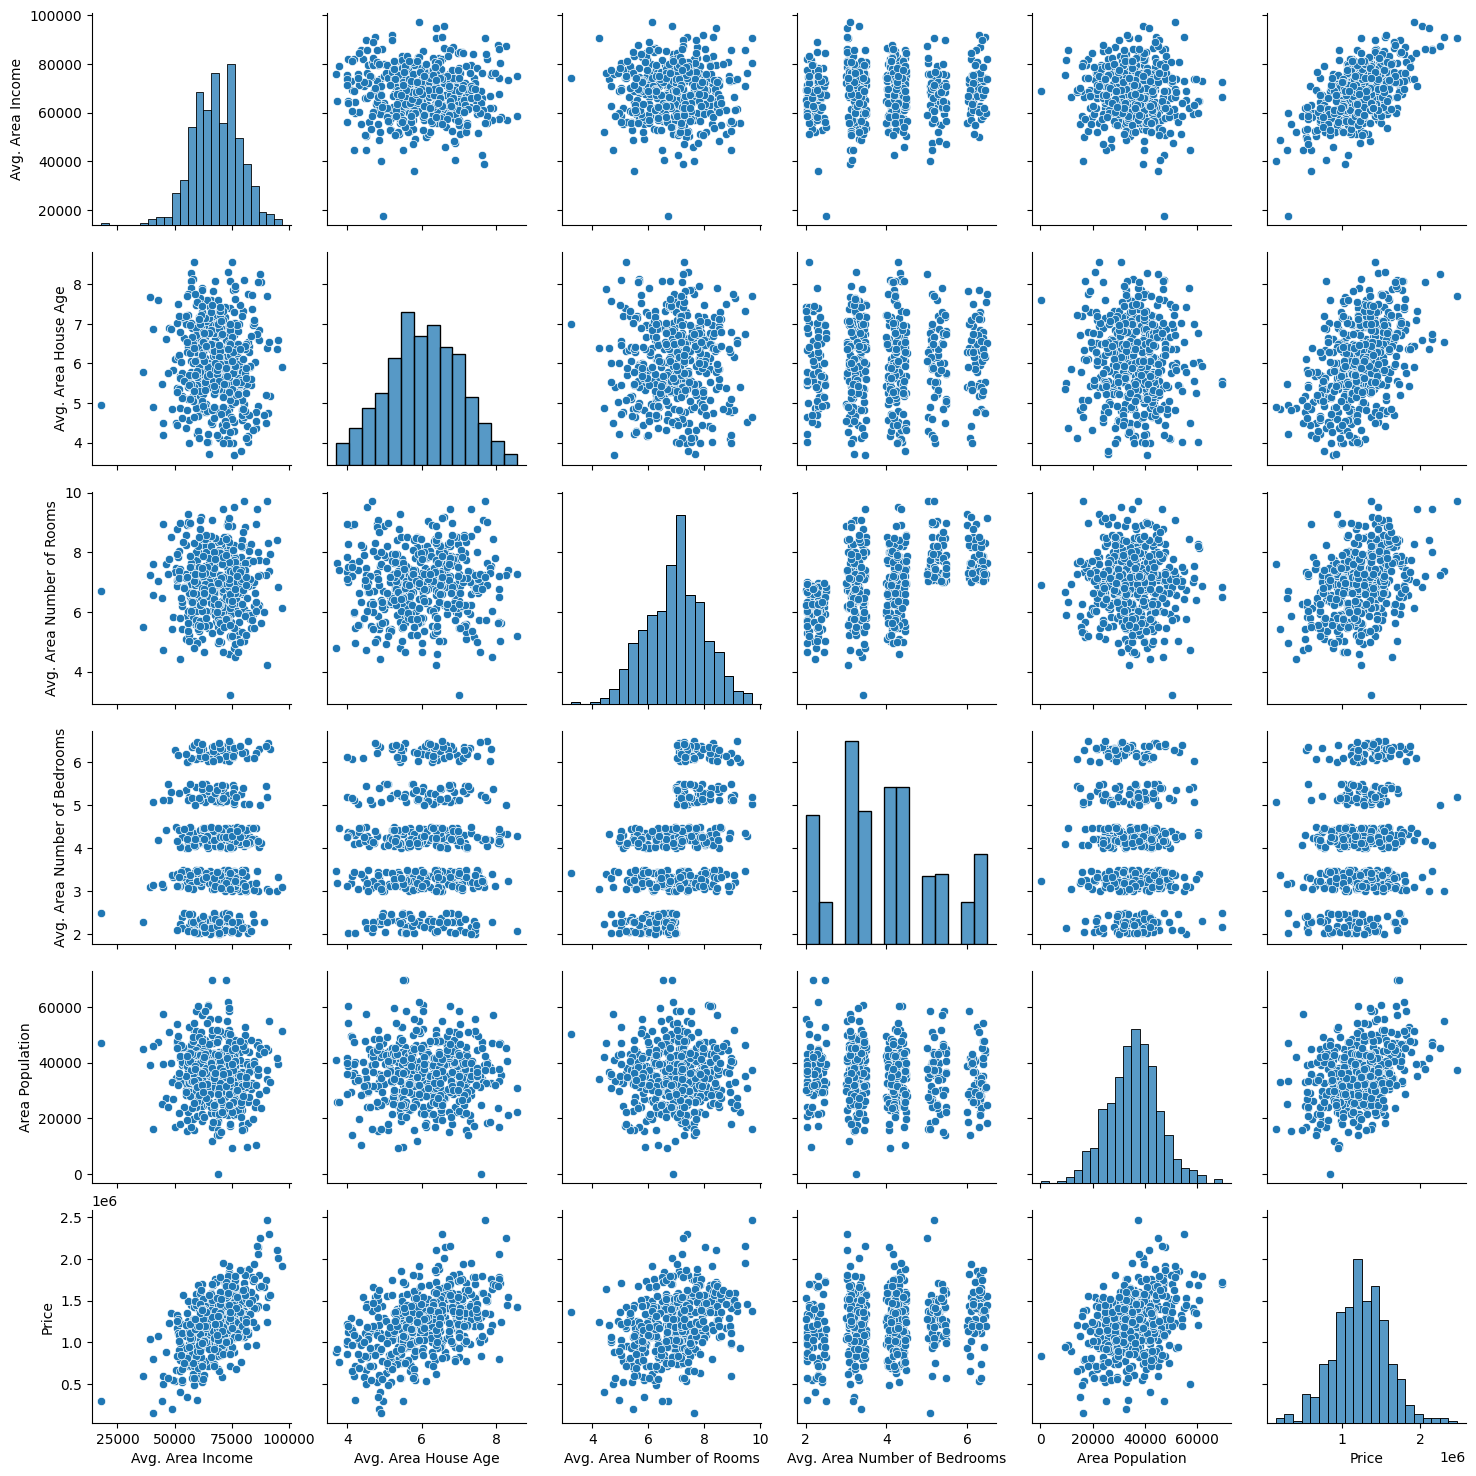

In [8]:
sns.pairplot(data)

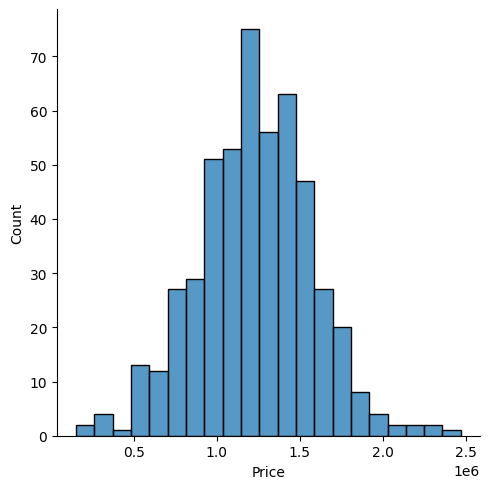

In [9]:
sns.displot(data['Price'])

<Axes: >

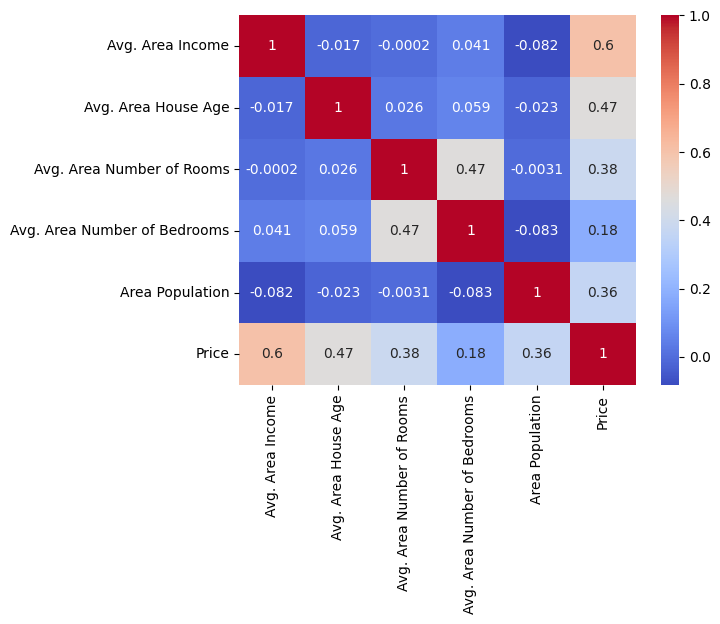

In [10]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

In [11]:

x=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y =data['Price']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
print(model.intercept_)

-2616054.403902619


In [18]:

coeff_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.381312
Avg. Area House Age,163656.850146
Avg. Area Number of Rooms,123315.953222
Avg. Area Number of Bedrooms,4074.995138
Area Population,14.596994


In [19]:
pred=model.predict(x_test)

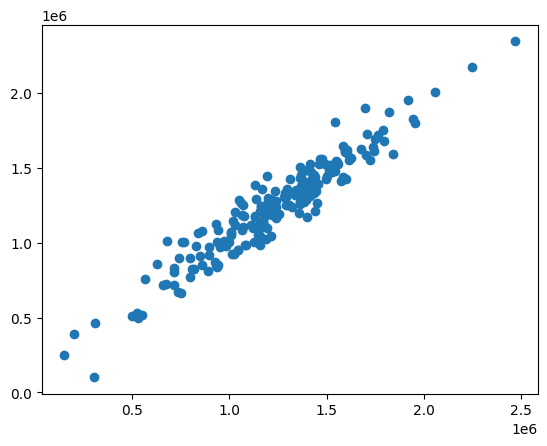

In [ ]:
plt.scatter(y_test,pred)

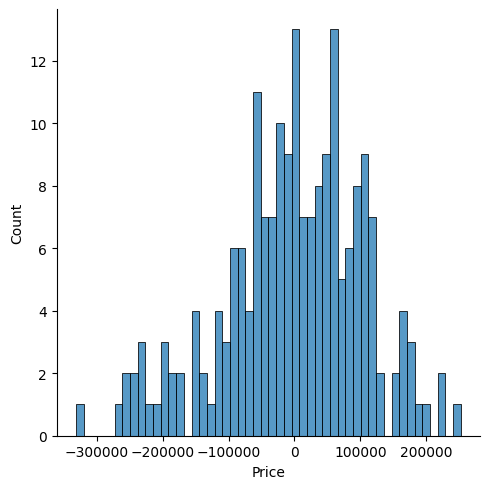

In [22]:
sns.displot((y_test-pred),bins=50);

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 82948.27673224623
MSE: 11295557755.284592
RMSE: 106280.56151189921
